In [1]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [1]:
from tensorflow.keras.layers import Input , Lambda, Dense , Flatten
from tensorflow.keras.models import Model
# from tensorflow.keras.applications.resnet50 import 
from tensorflow.keras.applications.inception_v3 import InceptionV3

# from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.inception_v3 import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt



In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rahulsingh04","key":"11119ccc31bf754e1313895e89641e20"}'}

In [4]:
# create a directory

!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/


In [6]:
!kaggle datasets download -d raaavan/cottonleafinfection

 98% 187M/192M [00:02<00:00, 60.8MB/s]
100% 192M/192M [00:03<00:00, 66.1MB/s]


In [8]:
# !chmod 600 /root/.kaggle/kaggle.json


In [9]:
# !chmod 600 /root/.kaggle/kaggle.json
# # 
# !kaggle datasets download -d raaavan/cottonleafinfection

In [10]:
# !kaggle datasets download -d raaavan/cottonleafinfection
# !--force to force download kaggle datasets download -d raaavan/cottonleafinfection


# New Section

In [7]:
!unzip /content/cottonleafinfection.zip


Archive:  /content/cottonleafinfection.zip
  inflating: cotton_infection_dir_ready/test/bacterial_blight/2015-angular-leaf-spot-colquitt-county-2.jpg  
  inflating: cotton_infection_dir_ready/test/bacterial_blight/bact102.jpg  
  inflating: cotton_infection_dir_ready/test/bacterial_blight/bact106.jpg  
  inflating: cotton_infection_dir_ready/test/bacterial_blight/bact107.jpg  
  inflating: cotton_infection_dir_ready/test/bacterial_blight/bact109.jpg  
  inflating: cotton_infection_dir_ready/test/bacterial_blight/bact11.jpg  
  inflating: cotton_infection_dir_ready/test/bacterial_blight/bact110.jpg  
  inflating: cotton_infection_dir_ready/test/bacterial_blight/bact111.jpg  
  inflating: cotton_infection_dir_ready/test/bacterial_blight/bact112.jpg  
  inflating: cotton_infection_dir_ready/test/bacterial_blight/bact113.jpg  
  inflating: cotton_infection_dir_ready/test/bacterial_blight/bact114.jpg  
  inflating: cotton_infection_dir_ready/test/bacterial_blight/bact119.jpg  
  inflating: 

In [8]:
Image_size = [224, 224]
train_path = "/content/cotton_infection_dir_ready/train"
test_path  = "/content/cotton_infection_dir_ready/test"

In [9]:
inception = InceptionV3(input_shape = Image_size + [3], weights = 'imagenet',  include_top = False)

87924736/87910968 [==============================] - 1s 0us/step


In [10]:
for layers in inception.layers:
  layers.trainable = False

In [11]:
folders = glob("/content/cotton_infection_dir_ready/train/*")
print(folders)
print(len(folders))

['/content/cotton_infection_dir_ready/train/healthy', '/content/cotton_infection_dir_ready/train/bacterial_blight', '/content/cotton_infection_dir_ready/train/curl_virus', '/content/cotton_infection_dir_ready/train/fussarium_wilt']
4


In [12]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation = 'softmax')(x)
model = Model(inputs = inception.input , outputs  = prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [13]:
#tell the model. what cost and the optimization methods have to use

In [14]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer ='adam',
    metrics =['accuracy']
)

In [15]:
#now use Image DataGenerator

train_datagen  = ImageDataGenerator(rescale = 1./255 , 
                                    shear_range = 0.2 , 
                                    zoom_range = 0.2 , 
                                    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory("/content/cotton_infection_dir_ready/train",
                                                 target_size = (224, 224), 
                                                 batch_size = 32 , 
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory("/content/cotton_infection_dir_ready/test" , 
                                            target_size = (224, 224), 
                                            batch_size = 32 , 
                                            class_mode ='categorical')

Found 1442 images belonging to 4 classes.
Found 343 images belonging to 4 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
46/46 [==============================] - 41s 577ms/step - loss: 4.1126 - accuracy: 0.6727 - val_loss: 0.3943 - val_accuracy: 0.9067
Epoch 2/20
46/46 [==============================] - 24s 525ms/step - loss: 0.4033 - accuracy: 0.9140 - val_loss: 0.1888 - val_accuracy: 0.9621
Epoch 3/20
46/46 [==============================] - 24s 522ms/step - loss: 0.2372 - accuracy: 0.9424 - val_loss: 0.1757 - val_accuracy: 0.9679
Epoch 4/20
46/46 [==============================] - 24s 520ms/step - loss: 0.2217 - accuracy: 0.9411 - val_loss: 0.2910 - val_accuracy: 0.9417
Epoch 5/20
46/46 [==============================] - 24s 519ms/step - loss: 0.3312 - accuracy: 0.9348 - val_loss: 1.0498 - val_accuracy: 0.8455
Epoch 6/20
46/46 [==============================] - 24s 518ms/step - loss: 0.2296 - accuracy: 0.9563 - val_loss: 0.0976 - val_accuracy: 0.9796
Epoch 7/20
46/46 [==============================] - 24s 518ms/step - loss: 0.1544 - accuracy: 0.9681 - val_loss: 0.4680 - val_accuracy: 0.9184

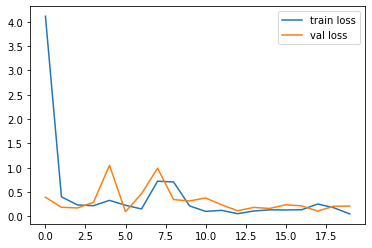

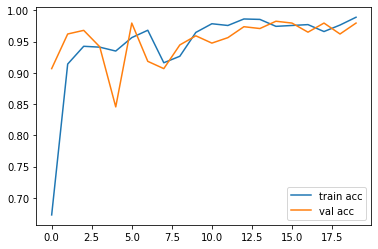

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt 
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [29]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('Inception.h5')

In [30]:
y_pred = model.predict(test_set)


In [31]:
print(y_pred)

[[1.4432496e-12 6.0749204e-11 2.2102840e-08 1.0000000e+00]
 [5.5979257e-09 1.4626148e-12 1.4802313e-19 1.0000000e+00]
 [2.9163650e-25 1.0000000e+00 1.9859168e-23 5.5460047e-22]
 ...
 [2.0129577e-13 1.0000000e+00 2.0092020e-17 1.5189361e-16]
 [1.0000000e+00 8.0629313e-36 3.2014465e-34 0.0000000e+00]
 [8.9391463e-17 1.0000000e+00 1.8435626e-19 8.0290779e-21]]


In [32]:
import pandas as pd
y_pred = np.argmax(y_pred, axis = 1)

In [33]:
print(y_pred)

[3 3 1 2 3 1 2 0 0 0 2 1 2 3 1 0 2 1 2 2 2 2 1 2 1 2 1 3 1 2 2 1 0 1 2 1 0
 3 1 1 2 2 0 0 0 0 2 0 3 2 1 0 0 0 1 2 3 2 0 2 0 0 0 2 1 2 3 2 1 3 1 2 3 3
 1 1 1 2 0 2 3 0 2 3 2 1 3 1 3 1 3 0 0 3 2 0 3 0 2 1 3 3 2 0 1 1 3 2 3 1 2
 1 2 3 2 1 3 1 0 3 0 0 3 0 0 0 1 3 3 3 0 0 3 1 3 3 0 1 0 2 1 0 2 3 2 3 3 3
 2 1 3 3 0 2 3 3 0 3 3 2 0 3 3 0 1 0 3 0 3 0 2 1 2 3 0 1 0 1 1 3 0 1 0 3 3
 3 2 3 2 1 1 0 2 2 0 3 0 3 2 1 0 1 2 1 0 2 0 2 3 3 1 2 2 3 0 1 2 0 0 3 0 0
 3 0 3 1 1 2 1 2 3 0 0 1 3 3 1 3 1 0 0 1 3 1 0 2 0 3 3 3 1 2 0 1 0 0 3 2 0
 2 1 3 1 2 0 3 2 1 2 2 3 2 0 2 0 1 0 1 2 3 2 0 1 0 2 0 0 3 2 2 0 1 3 0 0 0
 1 1 3 2 2 3 0 0 1 2 2 3 0 3 3 2 2 0 3 1 1 2 3 0 2 1 2 2 2 3 1 1 2 1 2 2 2
 0 0 0 2 1 3 0 1 0 1]


In [34]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [35]:
model=load_model('Inception.h5')


In [64]:
img=image.load_img('/content/cotton_infection_dir_ready/test/healthy/555.jpg',target_size=(224,224))

x=image.img_to_array(img)
x


array([[[ 49., 165., 250.],
        [ 54., 173., 255.],
        [ 53., 174., 255.],
        ...,
        [117., 188., 230.],
        [ 67., 178., 247.],
        [ 75., 181., 241.]],

       [[ 53., 167., 253.],
        [ 57., 173., 255.],
        [ 51., 172., 253.],
        ...,
        [117., 189., 229.],
        [ 67., 178., 247.],
        [ 73., 179., 239.]],

       [[ 55., 167., 251.],
        [ 57., 172., 255.],
        [ 52., 171., 253.],
        ...,
        [117., 189., 229.],
        [ 67., 179., 245.],
        [ 73., 179., 239.]],

       ...,

       [[141., 218., 238.],
        [145., 215., 240.],
        [149., 212., 245.],
        ...,
        [170., 211., 233.],
        [122., 210., 248.],
        [114., 213., 244.]],

       [[143., 218., 239.],
        [148., 215., 241.],
        [153., 213., 247.],
        ...,
        [170., 211., 233.],
        [122., 210., 248.],
        [114., 213., 244.]],

       [[146., 218., 240.],
        [151., 217., 243.],
        [155., 2

In [65]:
x=x/255
print(x.shape)

(224, 224, 3)


In [66]:
# import numpy as np
# x=np.expand_dims(x,axis=0)
# img_data=preprocess_input(x)
# img_data.shape

In [67]:

import numpy as np
x = np.expand_dims(x, axis = 0)
img_data = preprocess_input(x)
print(img_data.shape)

(1, 224, 224, 3)


In [68]:
model.predict(img_data)

array([[8.4802712e-05, 9.8181677e-01, 1.7977113e-02, 1.2124209e-04]],
      dtype=float32)

In [69]:
a=np.argmax(model.predict(img_data), axis=1)

In [70]:
print(a)

[1]


In [ ]:
from google.colab import files
files.upload()